# Decision Tree Practice

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn import tree

In [2]:
# Grabbing our data, then exploring it a bit
# Data source: https://www.kaggle.com/ronitf/heart-disease-uci
df = pd.read_csv("heart.csv")

# EDA

In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
X = df.drop(columns='target')
y = df.target

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [7]:
y_train.value_counts(normalize=True)

1    0.553719
0    0.446281
Name: target, dtype: float64

In [8]:
y_test.value_counts(normalize=True)

1    0.508197
0    0.491803
Name: target, dtype: float64

# Modeling 

## Logistic Regression

### Preprocessing

What kind of preprocessing steps are there?
- Imputing
- Scaling
- Encoding

In [9]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline

### Logistic Regression Model

In [13]:
from sklearn.linear_model import LogisticRegression
# Lets set up a Logistic Regression Pipeline

encoder = OneHotEncoder(drop='first')
catvar = ['restecg','slope','ca','thal']
catvarid = [X_train.columns.tolist().index(column) for column in catvar]

pipe_lr = make_pipeline(SimpleImputer(),
                        ColumnTransformer([("encoder",encoder,catvarid)],
                                          remainder = 'passthrough', 
                                          sparse_threshold=0),
                        StandardScaler(),
                        LogisticRegression())

In [15]:
# Lets fit the LogReg on our training and calculate our roc_auc_scores
pipe_lr.fit(X_train,y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('columntransformer',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('encoder',
                                                  OneHotEncoder(drop='first'),
                                                  [6, 10, 11, 12])])),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [16]:
train_pred = pipe_lr.predict_proba(X_train)
test_pred = pipe_lr.predict_proba(X_test)

In [17]:
train_score = roc_auc_score(y_train,train_pred[:,1])
test_score = roc_auc_score(y_test,test_pred[:,1])

In [20]:
print(f"Train ROC-AUC score:{train_score}")
print(f"Test ROC-AUC score:{test_score}")

Train ROC-AUC score:0.9596462133775566
Test ROC-AUC score:0.8741935483870967


How'd we do?

## Decision Trees

#### let's do a basic decision tree with just the default values

In [21]:
from sklearn.tree import DecisionTreeClassifier
# Fit the model and lets see the tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(255.75, 516.4200000000001, 'X[2] <= 0.5\ngini = 0.494\nsamples = 242\nvalue = [108, 134]'),
 Text(114.46153846153847, 462.06000000000006, 'X[9] <= 0.7\ngini = 0.394\nsamples = 115\nvalue = [84, 31]'),
 Text(57.23076923076923, 407.70000000000005, 'X[11] <= 0.5\ngini = 0.489\nsamples = 40\nvalue = [17, 23]'),
 Text(28.615384615384617, 353.34000000000003, 'X[0] <= 41.5\ngini = 0.32\nsamples = 25\nvalue = [5, 20]'),
 Text(14.307692307692308, 298.98, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(42.92307692307693, 298.98, 'X[3] <= 127.0\ngini = 0.165\nsamples = 22\nvalue = [2, 20]'),
 Text(28.615384615384617, 244.62, 'X[3] <= 123.0\ngini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(14.307692307692308, 190.26000000000005, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(42.92307692307693, 190.26000000000005, 'X[10] <= 1.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(28.615384615384617, 135.90000000000003, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(57.23076923076923,

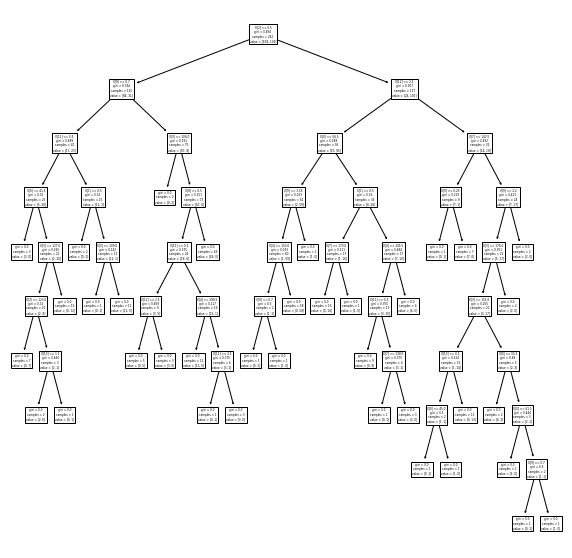

In [28]:
# Lets calculate the roc_auc_score
plt.figure(figsize=(10,10))

tree.plot_tree(dt)

In [25]:
train_pred = dt.predict_proba(X_train)
test_pred = dt.predict_proba(X_test)

In [26]:
train_score = roc_auc_score(y_train,train_pred[:,1])
test_score = roc_auc_score(y_test,test_pred[:,1])

In [27]:
print(f"Train ROC-AUC score:{train_score}")
print(f"Test ROC-AUC score:{test_score}")

Train ROC-AUC score:1.0
Test ROC-AUC score:0.7021505376344086


#### A simple decision tree with a single split

In [30]:
# lets set up the Decision Tree with a single split
from sklearn.tree import DecisionTreeClassifier
dt_1 = DecisionTreeClassifier(max_depth=1)
dt_1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

[Text(279.0, 407.70000000000005, 'X[2] <= 0.5\ngini = 0.494\nsamples = 242\nvalue = [108, 134]'),
 Text(139.5, 135.89999999999998, 'gini = 0.394\nsamples = 115\nvalue = [84, 31]'),
 Text(418.5, 135.89999999999998, 'gini = 0.307\nsamples = 127\nvalue = [24, 103]')]

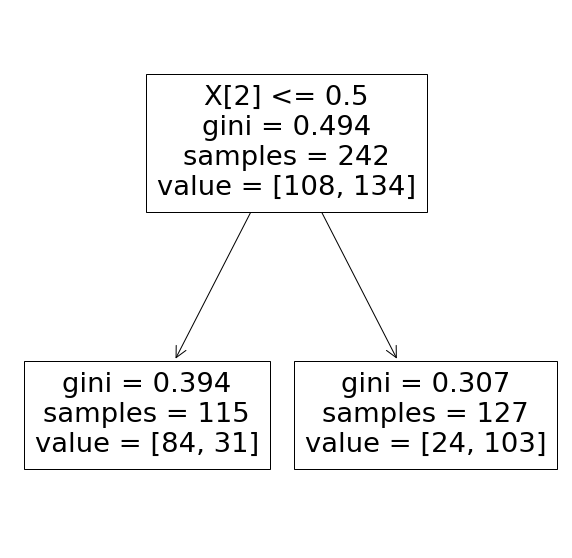

In [31]:
# Visualizing the single-split decision tree
plt.figure(figsize=(10,10))
tree.plot_tree(dt_1)

In [32]:
train_pred = dt_1.predict_proba(X_train)
test_pred = dt_1.predict_proba(X_test)

train_score = roc_auc_score(y_train,train_pred[:,1])
test_score = roc_auc_score(y_test,test_pred[:,1])

print(f"Train ROC-AUC score:{train_score}")
print(f"Test ROC-AUC score:{test_score}")

Train ROC-AUC score:0.7732172470978441
Test ROC-AUC score:0.7043010752688172


#### A simple decision tree with a single split

#### Try something Random!

In [ ]:
# Okay - time to change things!
# Replace None with relevant code
dt_2 = DecisionTreeClassifier(max_depth= None, criterion=None, 
                              min_samples_split=None)

dt_2.fit(X_train, y_train)

In [ ]:
# Visualizing the decision tree
plt.figure(figsize=(20,20))
tree.plot_tree(dt_2)

In [ ]:
# Lets calculate the roc_auc_score
train_preds = dt_2.predict_proba(X_train)
test_preds = dt_2.predict_proba(X_test)

train_score = roc_auc_score(y_train, train_preds[:,1])
test_score = roc_auc_score(y_test, test_preds[:,1])

print(f"Train ROC-AUC: {train_score}")
print(f"Test ROC-AUC: {test_score}")

## [GridSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

Lets start by taking a look at the documentation

In [40]:
grid_params = {
    'max_depth': [3,4,5,6,7],
    'max_features': ['sqrt','log2'],
    'class_weight': [None, 'balanced'],   
    'criterion': ['gini','entropy']
}

grid_search = GridSearchCV(dt, grid_params, cv = 4, scoring='roc_auc')

In [41]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7],
                         'max_features': ['sqrt', 'log2']},
             scoring='roc_auc')

In [44]:
dt_grid = grid_search.best_estimator_
dt_grid.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3, max_features='sqrt')

# Vizualizing all the models scores

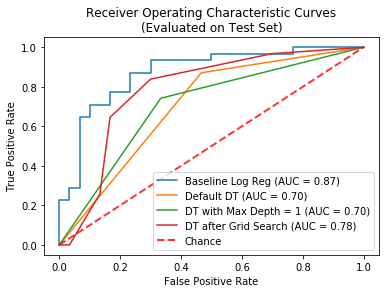

In [48]:
# Visualizing the ROCs for the models we've done
fig, ax = plt.subplots()
plot_roc_curve(pipe_lr, X_test, y_test, name="Baseline Log Reg", ax=ax)
plot_roc_curve(dt, X_test, y_test, name="Default DT", ax=ax)
plot_roc_curve(dt_1, X_test, y_test, name="DT with Max Depth = 1", ax=ax)
#plot_roc_curve(dt_maxdepth2, X_test, y_test, name="DT with Max Depth = 2", ax=ax)
#plot_roc_curve(dt_2, X_test, y_test, name="DT with Hyper Parameters", ax=ax)
plot_roc_curve(dt_grid, X_test, y_test, name="DT after Grid Search", ax=ax)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)
plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
ax.legend()
plt.show()

What can we learn from this visualization? Which is the best model - and how could you tell without looking at the scores?

- Baseline is still best - from both the visualization (closest to the '1' corner) and from the score

